In [1]:
import matplotlib
matplotlib.use('agg')

%load_ext autoreload
%autoreload 2
 
%matplotlib inline

from __future__ import absolute_import, division, print_function
import timeit
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import numpy as np
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.DEBUG)
import matplotlib.pyplot as plt
import random
import shutil
from collections import defaultdict

import cPickle as pickle

import sys
sys.path.append("../code")
from st_graph import hps
from stg_node import STGNode
from experiment_details import get_output_base

/Users/borisi/anaconda2/envs/proactive/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
robot_stg_node = STGNode('Al Horford', 'HomeC')
robot_node = str(robot_stg_node)

# Dataset Info

In [3]:
from glob import glob
from st_graph import *
from data_utils import *
from stg_node import *

tf.reset_default_graph()

In [4]:
NUM_DATAFILES = 2
ROWS_TO_EXTRACT = 100

In [5]:
positions_map_path = "data/positions_map.pkl"
pos_dict_path = "data/pos_dict_eval_%d_files_%s_rows.pkl" % (NUM_DATAFILES, str(ROWS_TO_EXTRACT))

with open(pos_dict_path, 'rb') as f:
    pos_dict = pickle.load(f)

train_data_dict_path = "data/train_data_dict_%d_files_%s_rows.pkl" % (NUM_DATAFILES, str(ROWS_TO_EXTRACT))
with open(train_data_dict_path, 'rb') as f:
    train_data_dict = pickle.load(f)

eval_data_dict_path = "data/eval_data_dict_%d_files_%s_rows.pkl" % (NUM_DATAFILES, str(ROWS_TO_EXTRACT))
with open(eval_data_dict_path, 'rb') as f:
    eval_data_dict = pickle.load(f)

In [6]:
len(train_data_dict['labels'].keys())

19

In [7]:
train_data_dict['labels'].keys()

[HomeSG/JustinHoliday_label,
 AwayC/WillieCauley-Stein_label,
 HomeSG/KyleKorver_label,
 HomeC/AlHorford_label,
 HomePG/DennisSchroder_label,
 AwaySG/MarcoBelinelli_label,
 HomeSF/ThaboSefolosha_label,
 AwayC/KostaKoufos_label,
 AwaySF/RudyGay_label,
 HomePG/ShelvinMack_label,
 AwayC/DeMarcusCousins_label,
 HomePF/PaulMillsap_label,
 AwaySF/OmriCasspi_label,
 AwayPF/QuincyAcy_label,
 AwayPG/RajonRondo_label,
 AwaySG/BenMcLemore_label,
 HomeSG/LamarPatterson_label,
 HomeC/TiagoSplitter_label,
 AwayPG/DarrenCollison_label]

In [8]:
train_data_dict['input_dict']['traj_lengths']

array([750, 488, 249, 249, 738, 738, 177, 362, 362, 900, 325, 325, 150,
       475, 850, 850, 850, 425, 425, 704, 775, 775, 801, 402,  77, 325,
       400, 600, 600, 469, 448, 469, 173, 750, 533, 384, 750, 775, 373,
       367, 812, 404, 404, 373, 373, 373, 469, 812, 469, 469, 469, 812,
       812, 750, 750, 779, 750, 402, 801, 367, 779, 210, 801, 576, 300,
       177, 406, 375, 375, 576, 575, 743, 525, 525, 228, 799, 228, 228,
       755, 300, 981, 981, 981, 981, 611, 632, 611], dtype=int32)

In [9]:
num_datapoints = 0
for interaction in train_data_dict['input_dict']['traj_lengths']:
    num_datapoints += interaction - 5 - 15
num_datapoints

45807

In [10]:
print(len(train_data_dict['input_dict']['traj_lengths']))
print(len(eval_data_dict['input_dict']['traj_lengths']))

87
46


In [11]:
print(train_data_dict['bag_names'])
print(eval_data_dict['bag_names'])

[u'11_18_2015_SAC_at_ATL/106', u'11_18_2015_SAC_at_ATL/44', u'11_18_2015_SAC_at_ATL/46', u'11_18_2015_SAC_at_ATL/47', u'11_18_2015_SAC_at_ATL/41', u'11_18_2015_SAC_at_ATL/43', u'11_18_2015_SAC_at_ATL/9', u'11_18_2015_SAC_at_ATL/6', u'11_18_2015_SAC_at_ATL/5', u'11_18_2015_SAC_at_ATL/4', u'11_18_2015_SAC_at_ATL/3', u'11_18_2015_SAC_at_ATL/2', u'11_18_2015_SAC_at_ATL/1', u'11_18_2015_SAC_at_ATL/59', u'11_18_2015_SAC_at_ATL/58', u'11_18_2015_SAC_at_ATL/57', u'11_18_2015_SAC_at_ATL/56', u'11_18_2015_SAC_at_ATL/55', u'11_18_2015_SAC_at_ATL/54', u'11_18_2015_SAC_at_ATL/53', u'11_18_2015_SAC_at_ATL/122', u'11_18_2015_SAC_at_ATL/121', u'11_18_2015_SAC_at_ATL/93', u'11_18_2015_SAC_at_ATL/102', u'11_18_2015_SAC_at_ATL/103', u'11_18_2015_SAC_at_ATL/62', u'11_18_2015_SAC_at_ATL/63', u'11_18_2015_SAC_at_ATL/60', u'11_18_2015_SAC_at_ATL/61', u'11_18_2015_SAC_at_ATL/67', u'11_18_2015_SAC_at_ATL/64', u'11_18_2015_SAC_at_ATL/69', u'11_18_2015_SAC_at_ATL/117', u'11_18_2015_SAC_at_ATL/116', u'11_18_2015_

In [12]:
print(len(set(eval_data_dict['input_dict'].keys()).union(set(train_data_dict['input_dict'].keys()))) - 4)

26


In [13]:
num_datapoints = 0
for interaction in eval_data_dict['input_dict']['traj_lengths'][:10]:
    num_datapoints += interaction - 5 - 15
num_datapoints

5512

In [14]:
print(45807 + 5512)


51319


# Plotting Results

In [15]:
# 2_files_2_rows_9.842520_edge_radius_mean_edge_inputs_bi-rnn_influences
# 2_files_50_rows_9.842520_edge_radius_mean_edge_inputs_bi-rnn_influences
# 2_files_100_rows_9.842520_edge_radius_mean_edge_inputs_bi-rnn_influences
# 2_files_all_rows_9.842520_edge_radius_mean_edge_inputs_bi-rnn_influences
# 3_files_100_rows_9.842520_edge_radius_mean_edge_inputs_bi-rnn_influences
# 5_files_100_rows_9.842520_edge_radius_mean_edge_inputs_bi-rnn_influences
# 5_files_200_rows_9.842520_edge_radius_mean_edge_inputs_bi-rnn_influences
# 5_files_all_rows_9.842520_edge_radius_mean_edge_inputs_bi-rnn_influences
# 10_files_all_rows_9.842520_edge_radius_mean_edge_inputs_bi-rnn_influences

num_nodes = [11, 24, 35, 41, 52, 64, 69, 75]
num_edges = [46, 90, 134, 156, 206, 255, 270, 292]
num_params = [2255434, 2504164, 2505508, 2506180, 2506852, 2759614, 2758942, 2758942]
mem_used_in_GB = [0.283718109131, 0.629661560059, 1.42868423462, 1.90161895752, 2.65640258789, 3.36085128784, 3.58042526245, 3.97806167603]
fwd_pass_time_in_s = [0.569844985008, 1.42772433758, 2.16095964432, 2.67397314548, 3.6033873415, 4.7138234067, 5.14370043755, 5.50420114994]

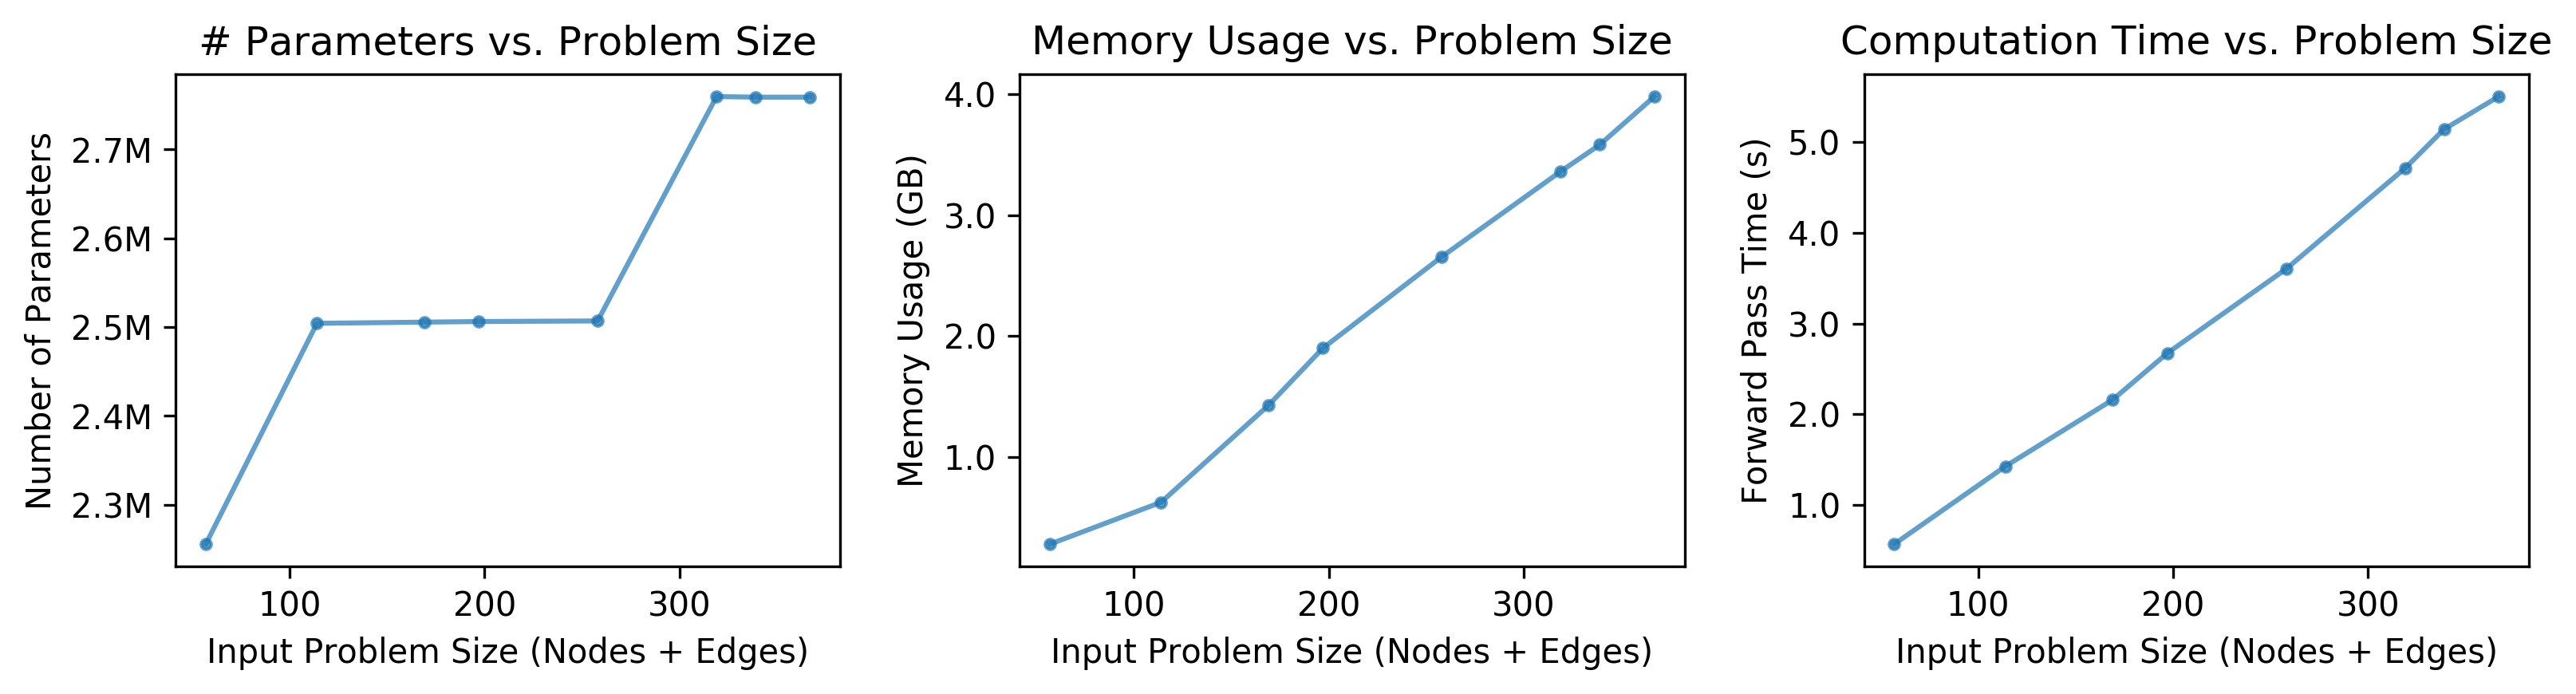

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11,3), dpi=300)
ax[0].plot(np.array(num_nodes) + np.array(num_edges), num_params, alpha=0.7, marker='.');
mkfunc = lambda x, pos: '%1.1fM' % (x * 1e-6) if x >= 1e6 else '%1.1fK' % (x * 1e-3) if x >= 1e3 else '%1.1f' % x
mkformatter = matplotlib.ticker.FuncFormatter(mkfunc)
ax[0].yaxis.set_major_formatter(mkformatter)
ax[0].set_title('# Parameters vs. Problem Size');
ax[0].set_ylabel('Number of Parameters');
ax[0].set_xlabel('Input Problem Size (Nodes + Edges)');

ax[1].plot(np.array(num_nodes) + np.array(num_edges), mem_used_in_GB, alpha=0.7, marker='.');
mkfunc = lambda x, pos: '%1.1f' % x
mkformatter = matplotlib.ticker.FuncFormatter(mkfunc)
ax[1].yaxis.set_major_formatter(mkformatter)
ax[1].set_title('Memory Usage vs. Problem Size');
ax[1].set_ylabel('Memory Usage (GB)');
ax[1].set_xlabel('Input Problem Size (Nodes + Edges)');

ax[2].plot(np.array(num_nodes) + np.array(num_edges), fwd_pass_time_in_s, alpha=0.7, marker='.');
mkfunc = lambda x, pos: '%1.1f' % x
mkformatter = matplotlib.ticker.FuncFormatter(mkfunc)
ax[2].yaxis.set_major_formatter(mkformatter)
ax[2].set_title('Computation Time vs. Problem Size');
ax[2].set_ylabel('Forward Pass Time (s)');
ax[2].set_xlabel('Input Problem Size (Nodes + Edges)');

fig.tight_layout()